
<link rel="stylesheet" href="https://unpkg.com/thebe@latest/lib/index.css">
<script src="https://unpkg.com/thebe@latest/lib/index.js"></script>

<script type="text/javascript">
  document.addEventListener("DOMContentLoaded", function() {
    thebelab.bootstrap({
      requestKernel: true,
      binderOptions: {
        repo: "your-repo/your-project",
        ref: "main",
      },
      codeMirrorConfig: {
        theme: "abcdef",
      },
    });
  });
</script>


# **Data Readiness For AI Checklist - Part 5**

 * Creator(s) John Pill
 * Affiliation: UK Met Office
 * History: 1.0
 * Last update: 27 August 2024.


---

## **Tutorial Material**

* **Run this Jupyter notebook locally using Jupyter Lab**
* **Select 'Run All Cells' from the 'Run' menu to generate the checklist**.
* **Remember to save your notebook regularly as you work through it.**


## **Data Section**
Scripts for pulling the data into the notebook assuming

---

In [1]:
import os
file_path = "../data/HadCRUT.5.0.2.0.analysis.anomalies.ensemble_mean.nc"

# Check if the file has already been downloaded, if not run the download_data.py script. 
if not os.path.exists(file_path):
    !python ../download_data.py

In [2]:
import xarray as xr
dataset = xr.open_dataset(file_path)
dataset

<xarray.Dataset> Size: 44MB
Dimensions:           (time: 2097, latitude: 36, longitude: 72, bnds: 2)
Coordinates:
  * time              (time) datetime64[ns] 17kB 1850-01-16T12:00:00 ... 2024...
  * latitude          (latitude) float64 288B -87.5 -82.5 -77.5 ... 82.5 87.5
  * longitude         (longitude) float64 576B -177.5 -172.5 ... 172.5 177.5
    realization       int64 8B ...
Dimensions without coordinates: bnds
Data variables:
    tas_mean          (time, latitude, longitude) float64 43MB ...
    time_bnds         (time, bnds) datetime64[ns] 34kB ...
    latitude_bnds     (latitude, bnds) float64 576B ...
    longitude_bnds    (longitude, bnds) float64 1kB ...
    realization_bnds  (bnds) int64 16B ...
Attributes:
    comment:      2m air temperature over land blended with sea water tempera...
    history:      Data set built at: 2024-11-05T11:36:43+00:00
    institution:  Met Office Hadley Centre / Climatic Research Unit, Universi...
    licence:      HadCRUT5 is licensed under the Open Government Licence v3.0...
    reference:    C. P. Morice, J. J. Kennedy, N. A. Rayner, J. P. Winn, E. H...
    source:       CRUTEM.5.0.2.0 HadSST.4.0.1.0
    title:        HadCRUT.5.0.2.0 blended land air temperature and sea-surfac...
    version:      HadCRUT.5.0.2.0
    Conventions:  CF-1.7

## **Setup Notebook**

In [3]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import json
import sys

sys.path.append(os.path.abspath('../../..')) # Add the parent directory to the system path

from utils import *

In [4]:
# Load checklist from JSON file:
checklist = load_checklist()

#### Reset stored answers to start again:

In [5]:
# Reset all checklist answers back to original blank answers for all sections.
# Any completed information will be lost. 

# To reset the stored answers uncomment and run these lines of code below. Re-comment the lines afterwards to avoid them running again. 
# reset_checklist()
# checklist = load_checklist()

# You can then re-run each section to reload it on the reset data. 

In [6]:

print("Dataset:", checklist["GeneralInformation"]["DatasetName"])
print("Dataset link:", checklist["GeneralInformation"]["DatasetLink"])
print("Assessor:", checklist["GeneralInformation"]["AssessorName"])
print("Assessor email:", checklist["GeneralInformation"]["AssessorEmailAddress"])

Dataset: HadCRUT5
Dataset link: https://www.metoffice.gov.uk/hadobs/hadcrut5/
Assessor: John Pill
Assessor email: john.pill@metoffice.gov.uk


---

## **5. Data Preparation**

### Null values

In [7]:

dataset_null_values = widgets.Combobox(
            value=checklist['DataPreparation']['NullValuesFilled'],
            options=['Yes', 'No', 'N/A'],
            description='5.1 Have null values/gaps been filled?',
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

display(dataset_null_values)

Combobox(value='Yes', description='5.1 Have null values/gaps been filled?', layout=Layout(width='900px'), opti…

> **Justification** <br>
> The dataset documentation explains how the dataset can be accessed with an infilled version, or a non-infilled version. You might also find it useful to use some of Xarray's methods to interogate the dataset. 

In [8]:
dataset.isnull().sum()

<xarray.Dataset> Size: 48B
Dimensions:           ()
Coordinates:
    realization       int64 8B ...
Data variables:
    tas_mean          int64 8B 1099727
    time_bnds         int64 8B 0
    latitude_bnds     int64 8B 0
    longitude_bnds    int64 8B 0
    realization_bnds  int64 8B 0

### Outliers

In [9]:

dataset_outliers = widgets.Combobox(
            value=checklist['DataPreparation']['OutliersIdentified'],
            options=['Yes, tagged ', 'Yes, removed', 'No', 'N/A'],
            description='5.2 Have outliers been identified?',
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

display(dataset_outliers)


Combobox(value='Yes, removed', description='5.2 Have outliers been identified?', layout=Layout(width='900px'),…

> **Justification** <br>
> The dataset documentation and report explains how methods have been used to ensure the reliability and validity of the dataset. It can also be useful to review a range of statistical information and charts to determine if you believe the dataset has outliers and whether they might be real, or not. Or useful, or not. 

In [10]:
print("Min:", dataset["tas_mean"].min().values)
print("Max:", dataset["tas_mean"].max().values)
print("Mean:", dataset["tas_mean"].mean().values)
print("Std:", dataset["tas_mean"].std().values)

Min: -16.327764503050744
Max: 12.605863929292596
Mean: 0.028644546826969715
Std: 1.2542650914478048


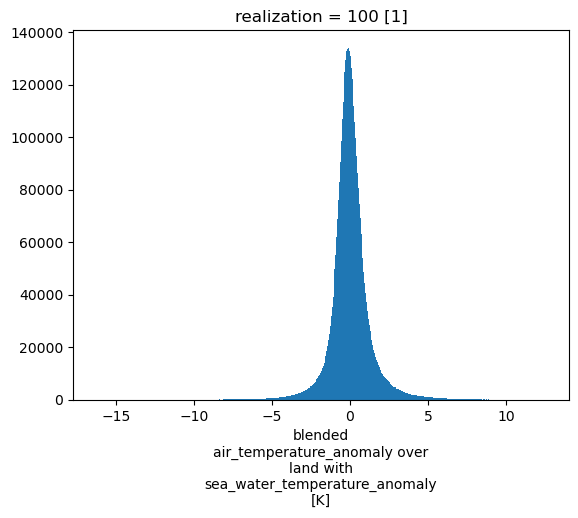

In [11]:
import matplotlib.pyplot as plt
dataset["tas_mean"].plot(bins=500)
plt.show()

### Gridded data


In [12]:

dataset_gridded = widgets.Combobox(
            value=checklist['DataPreparation']['Gridded'],
            options=['Regularly gridded in space', 'Constant time-frequency', 'Regularly gridded in space and constant time-frequency', 'Not gridded', 'N/A'],
            description='5.3 Is the data gridded (regularly sampled in time and space)?',
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

dataset_gridded_transformed = widgets.Combobox(
            value=checklist['DataPreparation']['TransformedFromOriginal'],
            options=['Yes, from irregular sampling', 'Yes, from a different regular sampling', 'No, this is the original sampling', 'N/A'],
            description='If the data is gridded, was it transformed from a different original sampling?',            
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )


dataset_gridded_original_sample = widgets.Combobox(
            value=checklist['DataPreparation']['OriginalSamplingAvailable'],
            options=['Yes', 'No', 'Only by request', 'N/A'],
            description = 'If the data is resampled from the original sampling, is the data also available at the original sampling?',
            placeholder=placeholder,
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

display(dataset_gridded, dataset_gridded_transformed, dataset_gridded_original_sample)

Combobox(value='Regularly gridded in space and constant time-frequency', description='5.3 Is the data gridded …

Combobox(value='Yes, from irregular sampling', description='If the data is gridded, was it transformed from a …

Combobox(value='Yes', description='If the data is resampled from the original sampling, is the data also avail…

### Targets / labels for supervised learning

In [13]:

dataset_targets_or_labels = widgets.Combobox(
            value=checklist['DataPreparation']['SupervisedLearningLabels'],
            options=['Yes', 'No', 'N/A'],
            description = '5.4 Are there associated targets or labels for supervised learning techniques?',
            placeholder='Click to select option - (Can this be used as a training dataset)?',
            layout=widgets.Layout(width=widget_width),
            style = description_style
            )

dataset_targets_or_labels_standards_label = widgets.Label(
    value = "If there are associated targets/labels, are community labeling standards implemented?"
)

dataset_targets_or_labels_standards = widgets.Text(
            value=checklist['DataPreparation']['SupervisedLearningLabelStandards'],
            placeholder = 'e.g., STAC label extension, ESA AIREO specification, etc.',
            layout = widgets.Layout(width=widget_width)
)

display(dataset_targets_or_labels, dataset_targets_or_labels_standards_label, dataset_targets_or_labels_standards)

Combobox(value='No', description='5.4 Are there associated targets or labels for supervised learning technique…

Label(value='If there are associated targets/labels, are community labeling standards implemented?')

Text(value='', layout=Layout(width='900px'), placeholder='e.g., STAC label extension, ESA AIREO specification,…

In [14]:

# Save button
save_button = widgets.Button(description="Save Data Access Answers to json file",  button_style="primary",  layout=widgets.Layout(flex='1 1 auto', width='auto'))

def generate_updates_preparation():

    updates = {
        "DataPreparation": {
            "NullValuesFilled": dataset_null_values.value,
            "OutliersIdentified": dataset_outliers.value,
            "Gridded": dataset_gridded.value,
            "TransformedFromOriginal": dataset_gridded_transformed.value,
            "OriginalSamplingAvailable": dataset_gridded_original_sample.value, 
            "SupervisedLearningLabels" : dataset_targets_or_labels.value,
            "SupervisedLearningLabelStandards" : dataset_targets_or_labels_standards.value,
          
        }
    }
    return updates

save_button.on_click(lambda b: update_checklist(b, generate_updates_preparation()))

display(save_button)

Button(button_style='primary', description='Save Data Access Answers to json file', layout=Layout(flex='1 1 au…

## Finished

In [15]:

button_print_json = widgets.Button(description="Print json results",  button_style='info', layout=widgets.Layout(flex='1 1 auto', width='auto'))
output = widgets.Output()

display(button_print_json, output)

def print_json_info(b):
    """
    Loads a copy of the json file to checklist variable. 
    Then prints the json file contents to Jupyter notebook cell output.

    Arguments: b - represents the button calling the function. 
    """
    checklist = load_checklist()
    with output:
        clear_output()
        for key, value in checklist.items():
            print(f"{key}:")
            if isinstance(value, dict):
                for sub_key, sub_value in value.items():
                    print(f"  {sub_key}: {sub_value}")
            else:
                print(f"  {value}")

button_print_json.on_click(print_json_info)


Button(button_style='info', description='Print json results', layout=Layout(flex='1 1 auto', width='auto'), st…

Output()

---

## **Appendix** - Definition of terms used in the checklist.